Download the data set about the batting figures of batsmen in ODI matches given below. Analyse the data.

Choose strike rate and average as the two factors on which you will cluster the data. 

You don’t need to clean the data. 

Just scale the data using the scale command and create the clusters.

 
Pointers before you proceed:

1. standardise all parameters using standard_scaler.fit_transform() and save the output to a variable before you proceed.

2. Choose random_state=100 for running K-Means in Python with SKLearn.

In [2]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
# from scipy.cluster.hierarchy import linkage
# from scipy.cluster.hierarchy import dendrogram
# from scipy.cluster.hierarchy import cut_tree

In [3]:
cricket = pd.read_csv("Cricket.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

In [5]:
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [6]:
cricket.shape

(79, 13)

### filtering data

In [11]:
cricket = cricket[["Player", "Ave", "SR"]]

In [16]:
cricket.shape

(79, 3)

In [17]:
cricket.head()

,Player,Ave,SR
0,SR Tendulkar (INDIA),44.83,86.23
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86
2,RT Ponting (AUS/ICC),42.03,80.39
3,ST Jayasuriya (Asia/SL),32.36,91.20
4,DPMD Jayawardene (Asia/SL),33.37,78.96


### Scaling Data

In [18]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [26]:
num_vars = ["Ave", "SR"]
cricket[num_vars] = standard_scaler.fit_transform(cricket[num_vars])

/home/niranjan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/niranjan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [27]:
cricket.shape

(79, 3)

In [28]:
cricket.head()

,Player,Ave,SR
0,SR Tendulkar (INDIA),1.072294,0.703152
1,KC Sangakkara (Asia/ICC/SL),0.587725,-0.044139
2,RT Ponting (AUS/ICC),0.596226,0.110997
3,ST Jayasuriya (Asia/SL),-1.047909,1.207091
4,DPMD Jayawardene (Asia/SL),-0.876185,-0.034000


## K-means

In [32]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(cricket[num_vars])
    sse_.append([k, silhouette_score(cricket[num_vars], kmeans.labels_)])

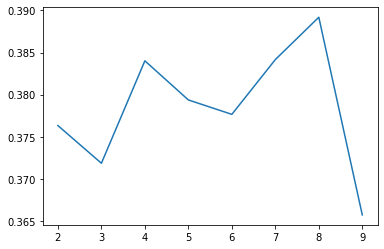

In [33]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### Optimal value of k = 8

In [35]:
model_clus = KMeans(n_clusters = 8, max_iter=50)
model_clus.fit(cricket[num_vars])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
# RFM.index = pd.RangeIndex(len(RFM.index))
# RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
# RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [38]:
model_clus.labels_

array([1, 4, 4, 3, 2, 4, 4, 4, 7, 4, 1, 4, 3, 5, 2, 5, 2, 1, 4, 7, 1, 7,
       7, 4, 3, 5, 2, 6, 0, 4, 2, 2, 7, 2, 5, 2, 2, 2, 5, 7, 2, 2, 5, 0,
       2, 0, 4, 0, 2, 4, 3, 4, 7, 2, 2, 0, 4, 1, 2, 1, 2, 3, 4, 1, 5, 1,
       2, 7, 4, 2, 1, 0, 2, 0, 7, 4, 2, 1, 2], dtype=int32)

In [40]:
cricket.index = pd.RangeIndex(len(cricket.index))
cricket_km = pd.concat([cricket, pd.Series(model_clus.labels_)], axis=1)
cricket_km.columns = ['Player', 'Ave', 'SR', 'ClusterID']

In [41]:
cricket_km.shape

(79, 4)

In [42]:
cricket_km.head()

,Player,Ave,SR,ClusterID
0,SR Tendulkar (INDIA),1.072294,0.703152,1
1,KC Sangakkara (Asia/ICC/SL),0.587725,-0.044139,4
2,RT Ponting (AUS/ICC),0.596226,0.110997,4
3,ST Jayasuriya (Asia/SL),-1.047909,1.207091,3
4,DPMD Jayawardene (Asia/SL),-0.876185,-0.034000,2


In [55]:
cricket_km_gb_cluster = cricket_km.groupby("ClusterID")
cricket_km_gb_cluster.head()

,Player,Ave,SR,ClusterID
0,SR Tendulkar (INDIA),1.072294,0.703152,1
1,KC Sangakkara (Asia/ICC/SL),0.587725,-0.044139,4
2,RT Ponting (AUS/ICC),0.596226,0.110997,4
3,ST Jayasuriya (Asia/SL),-1.047909,1.207091,3
4,DPMD Jayawardene (Asia/SL),-0.876185,-0.034000,2
5,Inzamam-ul-Haq (Asia/PAK),0.169465,-0.512591,4
6,JH Kallis (Afr/ICC/SA),0.992383,-0.649476,4
7,SC Ganguly (Asia/INDIA),0.424501,-0.567345,4
8,R Dravid (Asia/ICC/INDIA),0.108256,-0.816780,7
10,TM Dilshan (SL),0.126959,0.703152,1


In [52]:
cricket_km.pivot_table(columns=["ClusterID"], )

ClusterID,0,1,2,3,4,5,6,7
Ave,-1.156968,0.292562,-0.679104,-0.797294,0.573923,2.140533,-2.542423,0.286782
SR,-1.314925,0.824624,-0.168857,1.746520,-0.235838,0.947806,3.823117,-1.148796


In [110]:
# k = 4

model_clus4 = KMeans(n_clusters = 4, max_iter=50, random_state = 100)
model_clus4.fit(cricket[num_vars])

cricket.index = pd.RangeIndex(len(cricket.index))
cricket_km4 = pd.concat([cricket, pd.Series(model_clus4.labels_)], axis=1)
cricket_km4.columns = ['Player', 'Ave', 'SR', 'ClusterID']

pd.set_option("max_rows", 100)

cricket_km4.head(80)

,Player,Ave,SR,ClusterID
0,SR Tendulkar (INDIA),1.072294,0.703152,2
1,KC Sangakkara (Asia/ICC/SL),0.587725,-0.044139,0
2,RT Ponting (AUS/ICC),0.596226,0.110997,0
3,ST Jayasuriya (Asia/SL),-1.047909,1.207091,1
4,DPMD Jayawardene (Asia/SL),-0.876185,-0.034000,3
5,Inzamam-ul-Haq (Asia/PAK),0.169465,-0.512591,0
6,JH Kallis (Afr/ICC/SA),0.992383,-0.649476,0
7,SC Ganguly (Asia/INDIA),0.424501,-0.567345,0
8,R Dravid (Asia/ICC/INDIA),0.108256,-0.816780,0
9,BC Lara (ICC/WI),0.332688,0.021768,0


In [111]:
cricket_km_avg = pd.DataFrame(cricket_km4.groupby(["ClusterID"]).Ave.mean())
cricket_km_avg

,Ave
ClusterID,
0,0.503468
1,-0.529477
2,1.874242
3,-0.777680


In [112]:
cricket_km_sr = pd.DataFrame(cricket_km4.groupby(["ClusterID"]).SR.mean())
cricket_km_sr

,SR
ClusterID,
0,-0.359294
1,1.508830
2,0.910338
3,-0.535421


In [113]:
cricket_km4.sort_values(by="ClusterID")

,Player,Ave,SR,ClusterID
39,G Kirsten (SA),0.412600,-0.735663,0
62,WJ Cronje (SA),0.019843,-0.286477,0
32,Javed Miandad (PAK),0.540118,-1.245686,0
56,RR Sarwan (WI),0.705041,-0.360496,0
51,DM Jones (AUS),1.034889,-0.682936,0
23,ME Waugh (AUS),0.140561,-0.242876,0
65,RG Sharma (INDIA),0.669336,0.533820,0
21,DL Haynes (WI),0.484010,-1.643160,0
46,LRPL Taylor (NZ),0.951577,0.277287,0
19,S Chanderpaul (WI),0.523115,-0.867478,0


In [114]:
cricket_km4.sort_values(by="Player")

,Player,Ave,SR,ClusterID
40,A Flower (ZIM),-0.541237,-0.477102,3
67,A Jadeja (INDIA),-0.179085,-0.962790,3
31,A Ranatunga (SL),-0.456225,-0.141480,3
77,A Symonds (AUS),0.208570,1.332823,1
15,AB de Villiers (Afr/SA),2.554906,2.124728,2
12,AC Gilchrist (AUS/ICC),-0.447724,1.789106,1
71,ADR Campbell (ZIM),-1.364155,-1.329845,3
45,AR Border (AUS),-1.343752,-0.798528,3
78,Abdul Razzaq (Asia/PAK),-1.500174,0.198198,3
50,BB McCullum (NZ),-1.379457,1.731310,1


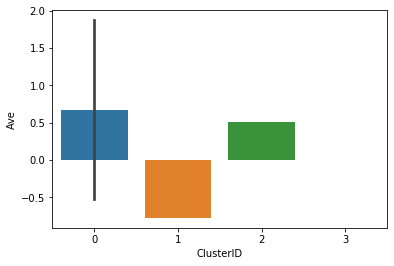

In [115]:
sns.barplot(x=cricket_km4.ClusterID, y=cricket_km4.groupby(["ClusterID"]).Ave.mean())

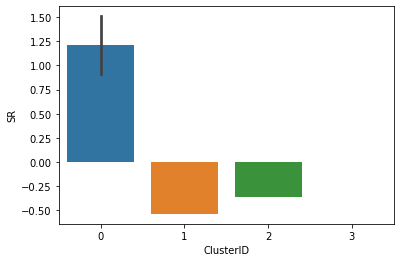

In [116]:
sns.barplot(x=cricket_km4.ClusterID, y=cricket_km4.groupby(["ClusterID"]).SR.mean())

In [117]:
km_clusters_ave = pd.DataFrame(cricket_km4.groupby(["ClusterID"]).Ave.mean())
km_clusters_sr = pd.DataFrame(cricket_km4.groupby(["ClusterID"]).SR.mean())

df = pd.concat([pd.Series([0,1,2,3]), km_clusters_ave, km_clusters_sr], axis=1)
df.columns = ["ClusterID", "Ave_mean", "SR_mean"]
df.sort_values(["Ave_mean", "SR_mean"])
df.head()

,ClusterID,Ave_mean,SR_mean
0,0,0.503468,-0.359294
1,1,-0.529477,1.508830
2,2,1.874242,0.910338
3,3,-0.777680,-0.535421


In [102]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

cricket_minmaxScaler = pd.read_csv("Cricket.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
cricket_minmaxScaler = cricket_minmaxScaler[["Player", "Ave", "SR"]]
num_vars = ["Ave", "SR"]
minmaxScaler = MinMaxScaler()
cricket_minmaxScaler[num_vars] = minmaxScaler.fit_transform(cricket_minmaxScaler[num_vars])

In [103]:
# k = 4  MinMaxScaler

model_clus_mms_4 = KMeans(n_clusters = 4, max_iter=50)
model_clus_mms_4.fit(cricket_minmaxScaler[num_vars])

cricket_minmaxScaler.index = pd.RangeIndex(len(cricket_minmaxScaler.index))
model_clus_mms_4 = pd.concat([cricket_minmaxScaler, pd.Series(model_clus_mms_4.labels_)], axis=1)
model_clus_mms_4.columns = ['Player', 'Ave', 'SR', 'ClusterID']

pd.set_option("max_rows", 100)

model_clus_mms_4.head(80)

,Player,Ave,SR,ClusterID
0,SR Tendulkar (INDIA),0.700033,0.454723,0
1,KC Sangakkara (Asia/ICC/SL),0.606190,0.324118,2
2,RT Ponting (AUS/ICC),0.607837,0.351232,2
3,ST Jayasuriya (Asia/SL),0.289430,0.542796,3
4,DPMD Jayawardene (Asia/SL),0.322687,0.325890,1
5,Inzamam-ul-Haq (Asia/PAK),0.525189,0.242247,2
6,JH Kallis (Afr/ICC/SA),0.684557,0.218324,2
7,SC Ganguly (Asia/INDIA),0.574580,0.232678,2
8,R Dravid (Asia/ICC/INDIA),0.513336,0.189084,2
9,BC Lara (ICC/WI),0.556799,0.335637,2


In [104]:
cricket_km_avg_mms = pd.DataFrame(model_clus_mms_4.groupby(["ClusterID"]).Ave.mean())
cricket_km_avg_mms

,Ave
ClusterID,
0,0.855340
1,0.341763
2,0.587269
3,0.378274


In [105]:
cricket_km_sr_mms = pd.DataFrame(model_clus_mms_4.groupby(["ClusterID"]).SR.mean())
cricket_km_sr_mms

,SR
ClusterID,
0,0.490933
1,0.238257
2,0.275670
3,0.608332


In [106]:
model_clus_mms_4.sort_values(by="ClusterID")

,Player,Ave,SR,ClusterID
0,SR Tendulkar (INDIA),0.700033,0.454723,0
38,MG Bevan (AUS),0.988146,0.240829,0
25,V Kohli (INDIA),1.000000,0.539075,0
42,IVA Richards (WI),0.771485,0.525075,0
34,HM Amla (SA),0.878499,0.504696,0
13,MS Dhoni (Asia/INDIA),0.913731,0.498316,0
63,MJ Guptill (NZ),0.649654,0.481304,0
15,AB de Villiers (Afr/SA),0.987158,0.703172,0
64,MEK Hussey (AUS),0.809351,0.471203,0
67,A Jadeja (INDIA),0.457689,0.163565,1


In [107]:
model_clus_mms_4.sort_values(by="Player")

,Player,Ave,SR,ClusterID
40,A Flower (ZIM),0.387554,0.248449,1
67,A Jadeja (INDIA),0.457689,0.163565,1
31,A Ranatunga (SL),0.404017,0.307106,1
77,A Symonds (AUS),0.532763,0.564771,3
15,AB de Villiers (Afr/SA),0.987158,0.703172,0
12,AC Gilchrist (AUS/ICC),0.405663,0.644515,3
71,ADR Campbell (ZIM),0.228186,0.099415,1
45,AR Border (AUS),0.232137,0.192274,1
78,Abdul Razzaq (Asia/PAK),0.201844,0.366472,1
50,BB McCullum (NZ),0.225222,0.634414,3


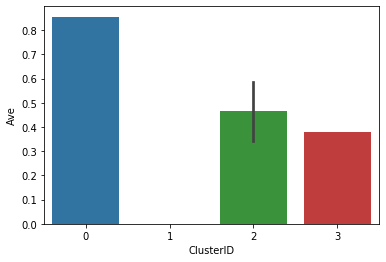

In [108]:
sns.barplot(x=model_clus_mms_4.ClusterID, y=model_clus_mms_4.groupby(["ClusterID"]).Ave.mean())

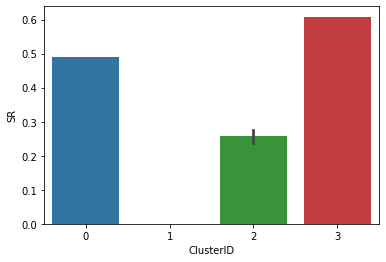

In [109]:
sns.barplot(x=model_clus_mms_4.ClusterID, y=model_clus_mms_4.groupby(["ClusterID"]).SR.mean())